***This project aim to use classification and clustering on hand gesture***
***https://www.kaggle.com/datasets/aryarishabh/hand-gesture-recognition-dataset***

# import libraries 

In [2]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



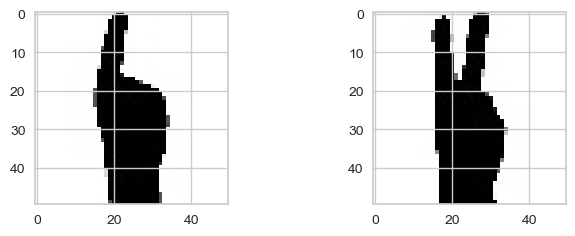

In [13]:
img = plt.imread("1/901.jpg")
img1 = plt.imread("2/901.jpg")
plt.figure()
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(img1)


# Read all pictures and convert them to numpy array with label to each tuple

In [4]:
directory = "1"
x=[]
for entry in os.scandir(directory):
    if entry.is_file() and entry.name.endswith('.jpg'):
        img = plt.imread(entry.path)
        img.resize((50,50))
        v=img.reshape(1,2500)
        v=v.tolist()
        v[0].append(0)
        x.extend(v)
        
class_one=np.array(x)




In [5]:
directory = "2"
x=[]
for entry in os.scandir(directory):
    if entry.is_file() and entry.name.endswith('.jpg'):
        img = plt.imread(entry.path)
        img.resize((50,50))
        v=img.reshape(1,2500)
        v=v.tolist()
        v[0].append(1)
        x.extend(v)
        
class_two=np.array(x)

class_one=class_one.tolist()
class_two=class_two.tolist()
k=class_one+class_two
dataset=np.array(k)


# apply PCA and slice the data

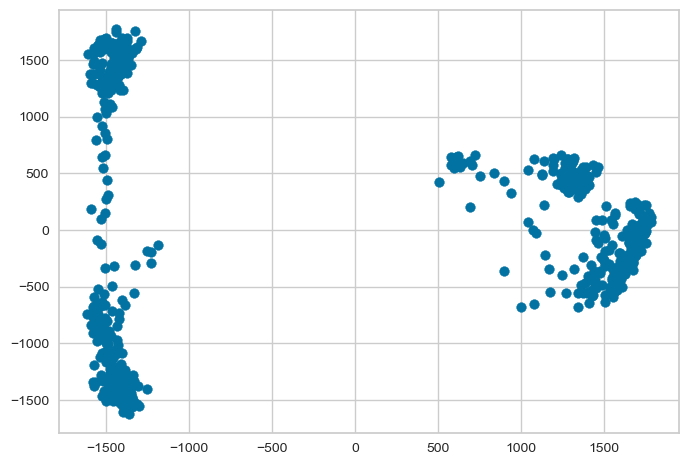

In [6]:
model = PCA(n_components= 2)
data_pca=model.fit_transform(dataset[:,:2500])
plt.scatter(data_pca[:,0],data_pca[:,1])
X_train,X_test,y_train,y_test=train_test_split(data_pca,dataset[:,2500],test_size=0.1,random_state=10)

# supervise learning models

**KNN Algorithm**

In [7]:
accuracy_KNN=[]
for i in [3,5,7]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy_KNN.append(accuracy_score(y_test, pred))
print(accuracy_KNN)

[1.0, 1.0, 1.0]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

**SVM Algorithm**

In [8]:
accuracy_SVC=[]
for i in [0.001,0.1,2]:
    clf = SVC(kernel='linear',C=i)
    pred =clf.fit(X_train, y_train)
    accuracy_SVC.append(clf.score(X_test,y_test))
print(accuracy_SVC)

[1.0, 1.0, 1.0]


# unsupervise learning models

**KMEAN Algorithm**

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


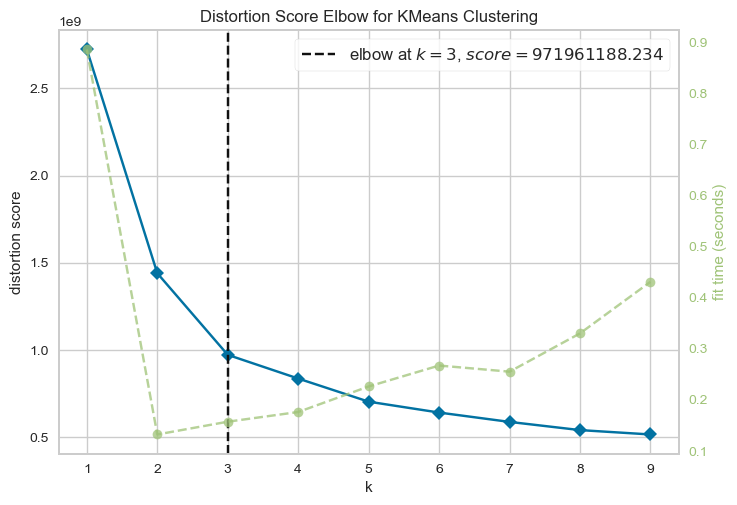

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(dataset[:,:2500])
visualizer.show()

In [10]:
kmeans = KMeans(n_clusters=3)
results = kmeans.fit_predict(dataset[:,:2500])
accuracy_KMean=accuracy_score(dataset[:,2500], results)
print(accuracy_KMean)

0.72


**DBSCAN Algorithm**

In [11]:
dbscan = DBSCAN(eps=2000,min_samples=6)
results = dbscan.fit_predict(dataset[:,:2500])
accuracy_dbscan=accuracy_score(dataset[:,2500], results)
print(accuracy_dbscan)


0.9733333333333334


## find the optimal tuning hyperparameter for DBSCAN ALGORITHM

*_Reference_*
***https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf***
***https://www.kaggle.com/code/karimsaid129/nearestneighbors-to-find-optimal-eps-in-dbscan/edit***


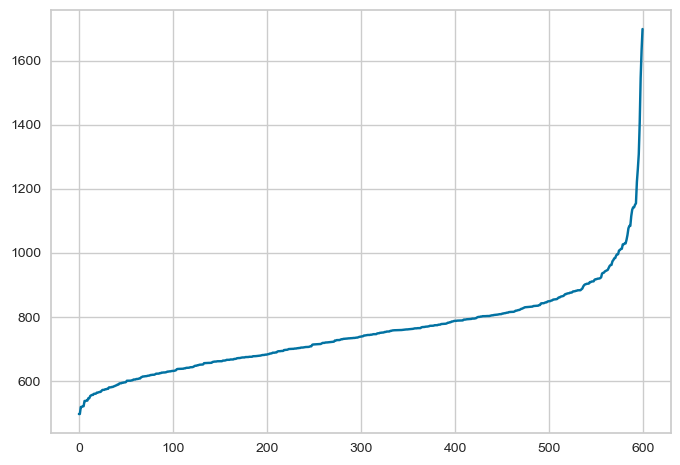

In [12]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dataset[:,:2500])
distances, indices = nbrs.kneighbors(dataset[:,:2500])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [15]:
model = PCA(n_components= 2)
data_pca=model.fit_transform(dataset[:,:2500])


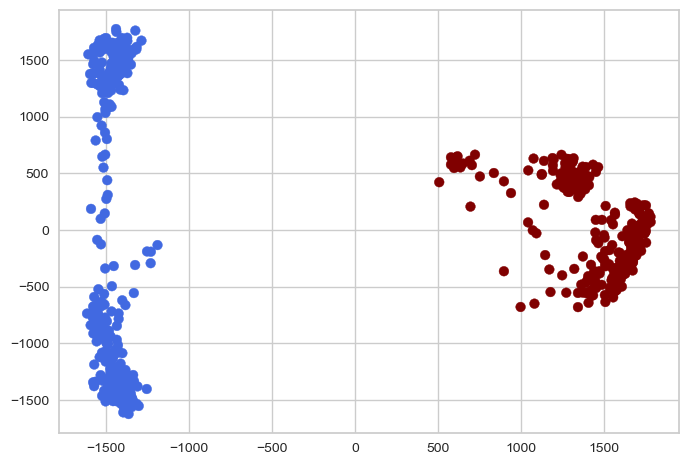

In [16]:
m = DBSCAN(eps=1600, min_samples=6)
m.fit(data_pca)
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(data_pca[:,0], data_pca[:,1], c=vectorizer(clusters))